https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

# Step 1: Import libraries and modules 

In [2]:
import numpy as np  # for more efficient numerical computation
import pandas as pd # for dataframes
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # for scaling, transforming, and wrangling data

### - Model *families*

> - A "family" of models are broad types of models, such as random forests, SVM's, linear regression models, etc. 
> - Within each family of models, you'll get an actual model after you *fit* and *tune* its parameters to the data

In [3]:
from sklearn.ensemble import RandomForestRegressor

### - Cross-vaildation

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### -  Evaluate our model performance

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

### - Save model for future use

In [6]:
from sklearn.externals import joblib

# Step 2: Load red wine data

In [7]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# data = pd.read_csv(dataset_url)
data = pd.read_csv("winequality-red.csv")

In [8]:
data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

In [9]:
data = pd.read_csv("winequality-red.csv", sep=';')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [10]:
data.shape

(1599, 12)

In [11]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

- List of all the features:

    - **quality** (target)
    - fixed acidity
    - volatile acidity
    - citric acid
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - density
    - pH
    - sulphates
    - alcohol

# Step 3: Split data into training and test sets

In [12]:
X = data.drop('quality', axis=1)
y = data.quality

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)

# Step 4: Declare data preprocessing steps

### WTF is standardization?

>Standardization is the process of **subtracting** the *means* from each feature and then **dividing** by the feature *standard deviations*.

### - Scale the data

In [14]:
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[ 0.51358886,  2.19680282, -0.164433  , ...,  1.08415147,
        -0.69866131, -0.58608178],
       [-1.73698885, -0.31792985, -0.82867679, ...,  1.46964764,
         1.2491516 ,  2.97009781],
       [-0.35201795,  0.46443143, -0.47100705, ..., -0.13658641,
        -0.35492962, -0.20843439],
       ..., 
       [-0.98679628,  1.10708533, -0.93086814, ...,  0.24890976,
        -0.98510439,  0.35803669],
       [-0.69826067,  0.46443143, -1.28853787, ...,  1.08415147,
        -0.35492962, -0.68049363],
       [ 3.1104093 , -0.62528606,  2.08377675, ..., -1.61432173,
         0.79084268, -0.39725809]])

>You can confirm that the scaled dataset is indeed centered at *zero*, with unit *variance*:

In [15]:
print (X_train_scaled.mean(axis=0))
print (X_train_scaled.std(axis=0))

[  1.16664562e-16  -3.05550043e-17  -8.47206937e-17  -2.22218213e-17
   2.22218213e-17  -6.38877362e-17  -4.16659149e-18  -2.54439854e-15
  -8.70817622e-16  -4.08325966e-16  -1.17220107e-15]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


#### - We won't use this code because we won't be able to perform the exact same transformation on the test set.

### - **Transformer API**

Here's what that process looks like:

   1. Fit the transformer on the training set (saving the means and standard deviations)
   2. Apply the transformer to the training set (scaling the training data)
   3. Apply the transformer to the test set (using the same means and standard deviations)

> This makes your final estimate of model performance more *realistic*, and it allows to insert your preprocessing steps into a **cross-validation** pipeline

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)

Now, the **scaler** object has the saved means and standard deviations for each feature in the training set.

In [17]:
X_train_scaled = scaler.transform(X_train)
print (X_train_scaled.mean(axis=0))
print (X_train_scaled.std(axis=0))

[  1.16664562e-16  -3.05550043e-17  -8.47206937e-17  -2.22218213e-17
   2.22218213e-17  -6.38877362e-17  -4.16659149e-18  -2.54439854e-15
  -8.70817622e-16  -4.08325966e-16  -1.17220107e-15]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [18]:
X_test_scaled = scaler.transform(X_test)
print (X_test_scaled.mean(axis=0))
print (X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[ 1.02160495  1.00135689  0.97456598  0.91099054  0.86716698  0.94193125
  1.03673213  1.03145119  0.95734849  0.83829505  1.0286218 ]


### - Pipeline with preprocessing and model

In [19]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

- This is exactly what it looks like: a **modeling pipeline** that first 
    - *transforms* the data using StandardScaler() and then 
    - *fits* a model using a random forest regressor.

# Step 5: Declare hyperparameters to tune

- As an example, let's take our random forest for regression:
  Within each decision tree, the computer can empirically decide where to create branches based on either mean-squared-error (MSE) or mean-absolute-error (MAE). Therefore, the actual branch locations are model **parameters**

- However, the algorithm does not know which of the two criteria, MSE or MAE, that it should use. The algorithm also cannot decide how many trees to include in the forest. These are examples of hyperparameters that the user must set.

In [20]:
pipeline.get_params()

{'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__min_impurity_split': 1e-07,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': 1,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'rando

In [21]:
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth' : [None, 5, 3, 1]}

# Step 6: Tune model using a cross-validation pipeline

### - Cross-validation
- This is one of the most important skills in all of machine learning because it helps you **maximize** *model performance* while **reducing** the chance of *overfitting*

> a process for reliably **estimating** the *performance* of a method for building a model by training and evaluating your model multiple times using the same method

- Practically, that "method" is simply a set of hyperparameters in this context

- These are the steps for CV :

    1. Split your data into *k* equal parts, or "folds" (typically *k*=10).
    2. Train your model on *k*-1 folds (e.g. the first 9 folds).
    3. Evaluate it on the remaining "hold-out" fold (e.g. the 10th fold).
    4. Perform steps (2) and (3) *k* times, each time holding out a different fold.
    5. Aggregate the performance across all *k* folds. This is your performance metric.
    
    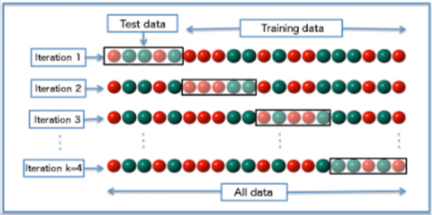

#### Why is cross-validation important in machine learning?

Let's say you want to train a random forest regressor. One of the hyperparameters you must tune is the maximum depth allowed for each decision tree in your forest.

#### How can you decide? 

That's where cross-validation comes in. Using only your training set, you can use CV to evaluate different hyperparameters and estimate their effectiveness.

This allows you to keep your test set "untainted" and save it for a true hold-out evaluation when you're finally ready to select a model.

For example, you can use CV to tune a random forest model, a linear regression model, and a k-nearest neighbors model, using only the training set. Then, you still have the untainted test set to make your final selection between the model families!

#### So WTF is a cross-validation "pipeline?"

The best practice when performing CV is to include your data preprocessing steps inside the cross-validation loop. This prevents accidentally tainting your training folds with influential data from your test fold.

- Here's how the CV pipeline looks after including preprocessing steps:

    1. Split your data into *k* equal parts, or "folds" (typically *k*=10).
    2. **Preprocess *k*-1 training folds.**
    3. Train your model on the same *k*-1 folds.
    4. **Preprocess the hold-out fold using the same transformations from step (2).**
    5. Evaluate your model on the same hold-out fold.
    6. Perform steps **(2) - (5)** *k* times, each time holding out a different fold.
    5. Aggregate the performance across all *k* folds. This is your performance metric.

Fortunately, Scikit-Learn makes it stupidly simple to set this up:

In [22]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Yes, it's really that easy. **GridSearchCV** essentially performs cross-validation across the entire "grid" (all possible permutations) of hyperparameters.

It takes in your model (in this case, we're using a model *pipeline*), the hyperparameters you want to tune, and the number of folds to create.

Now, you can see the best set of parameters found using CV:

In [23]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}


Interestingly, it looks like the default parameters win out for this data set.

*Tip: It turns out that in practice, random forests don't actually require a lot of tuning. They tend to work pretty well out-of-the-box with a reasonable number of trees. Even so, these same steps can be used when building any type of supervised learning model.*

# Step 7: Refit on the entire training set

After you've tuned your hyperparameters appropriately using cross-validation, you can generally get a small performance improvement by refitting the model on the entire training set.

Conveniently, GridSearchCV from sklearn will automatically refit the model with the best set of hyperparameters using the entire training set.

This functionality is ON by default, but you can confirm it:

In [24]:
print(clf.refit)

True


Now, you can simply use the **clf** object as your *model* when applying it to other sets of data. That's what we'll be doing in the next step.

# Step 8: Evaluate model pipeline on test data

This step is really straightforward once you understand that the  clf object you used to tune the hyperparameters can also be used directly like a model object.

Here's how to predict a new set of data:

In [25]:
y_pred = clf.predict(X_test)

Now we can use the metrics we imported earlier to evaluate our model performance.

In [28]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.466987590048
0.34393875


There are various ways to improve a model. We'll have more guides that go into detail about how to improve model performance, but here are a few quick things to try:

   1. Try other regression model families (e.g. regularized regression, boosted trees, etc.).
   2. Collect more data if it's cheap to do so.
    Engineer smarter features after spending more time on exploratory analysis.
   3. Speak to a domain expert to get more context (...this is a good excuse to go wine tasting!).


# Step 9: Save model for future use.

#### Save the model

In [29]:
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

#### Load the model again

In [31]:
clf2 = joblib.load('rf_regressor.pkl')

# Predict data set using loaded model
clf2.predict(X_test)

array([ 6.41,  5.77,  4.99,  5.45,  6.26,  5.58,  5.04,  4.87,  5.02,
        5.97,  5.33,  5.58,  5.9 ,  5.11,  5.84,  5.64,  6.56,  5.76,
        5.7 ,  6.99,  5.47,  5.69,  5.09,  6.05,  5.96,  5.01,  5.42,
        5.13,  6.02,  6.  ,  5.88,  6.46,  5.98,  5.12,  5.03,  5.96,
        5.05,  6.07,  5.05,  5.93,  4.94,  5.79,  6.62,  5.15,  6.25,
        5.29,  5.44,  5.5 ,  5.2 ,  6.4 ,  5.98,  5.22,  5.79,  5.23,
        5.61,  5.68,  5.33,  5.45,  4.99,  5.19,  5.2 ,  5.11,  5.08,
        5.89,  6.07,  5.23,  6.47,  5.03,  5.22,  6.6 ,  5.62,  5.74,
        5.06,  5.01,  5.4 ,  6.02,  5.27,  5.1 ,  5.29,  5.23,  6.22,
        5.6 ,  6.23,  6.47,  5.07,  5.97,  6.32,  6.36,  5.6 ,  5.74,
        5.88,  5.44,  6.35,  5.79,  5.71,  5.8 ,  6.79,  6.83,  5.5 ,
        6.81,  5.07,  5.38,  5.18,  6.35,  5.14,  4.7 ,  5.75,  5.03,
        5.67,  5.94,  5.9 ,  5.62,  6.03,  5.32,  5.23,  5.31,  5.97,
        5.07,  4.85,  5.96,  5.88,  5.08,  5.75,  6.16,  5.23,  5.4 ,
        5.25,  6.06,

# The complete code, from start to finish

Here's all the code in one place, in a single script.

> #### 2. Import libraries and modules
> import numpy as np
> import pandas as pd
>  
> from sklearn.model_selection import train_test_split
> from sklearn import preprocessing
> from sklearn.ensemble import RandomForestRegressor
> from sklearn.pipeline import make_pipeline
> from sklearn.model_selection import GridSearchCV
> from sklearn.metrics import mean_squared_error, r2_score
> from sklearn.externals import joblib 
>  
> #### 3. Load red wine data.
> dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
> data = pd.read_csv(dataset_url, sep=';')
>  
> #### 4. Split data into training and test sets
> y = data.quality
> X = data.drop('quality', axis=1)
> X_train, X_test, y_train, y_test = train_test_split(X, y, 
>                                                     test_size=0.2, 
>                                                     random_state=123, 
>                                                     stratify=y)
>  
> #### 5. Declare data preprocessing steps
> pipeline = make_pipeline(preprocessing.StandardScaler(), 
>                          RandomForestRegressor(n_estimators=100))
>  
> #### 6. Declare hyperparameters to tune
> hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
>                   'randomforestregressor__max_depth': [None, 5, 3, 1]}
>  
> #### 7. Tune model using cross-validation pipeline
> clf = GridSearchCV(pipeline, hyperparameters, cv=10)
>  
> clf.fit(X_train, y_train)
>  
> #### 8. Refit on the entire training set
> #######  No additional code needed if clf.refit == True (default is True)
>  
> #### 9. Evaluate model pipeline on test data
> pred = clf.predict(X_test)
> print r2_score(y_test, pred)
> print mean_squared_error(y_test, pred)
 
> #### 10. Save model for future use
> joblib.dump(clf, 'rf_regressor.pkl')
> ####### To load: clf2 = > joblib.load('rf_regressor.pkl')